In [1]:
import pandas as pd
import numpy as np

In [2]:
trans = pd.read_csv("transactions_info.csv")
trans

,item_code,invoice_num,invoice_time,item_qty
0,1080988,4989509,2022-03-11T09:37:02.000Z,1.000
1,505825,4989509,2022-03-11T09:36:54.000Z,1.000
2,505825,2124807,2022-03-11T09:11:50.000Z,1.000
3,898,2124807,2022-03-11T09:11:53.000Z,1.000
4,129022,2125158,2022-03-11T22:36:00.000Z,1.000
...,...,...,...,...
352346,1095469,3151809,2022-02-12T16:51:25.000Z,1.000
352347,1014424,3151809,2022-02-12T16:52:51.000Z,1.000
352348,1075651,3151809,2022-02-12T16:52:05.000Z,1.000
352349,861946,3151809,2022-02-12T16:51:29.000Z,1.000


In [3]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352351 entries, 0 to 352350
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   item_code     352351 non-null  int64  
 1   invoice_num   352351 non-null  object 
 2   invoice_time  352351 non-null  object 
 3   item_qty      352351 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.8+ MB


In [4]:
trans.isnull().sum()

item_code       0
invoice_num     0
invoice_time    0
item_qty        0
dtype: int64

In [5]:
items = pd.read_csv("item_info.csv")
items

,item_code,item_sub_segment,item_segment,item_category,item_sub_department,item_department
0,379231.0,Powders,Chilies,Spices,Seasoning & Coconut Cream,Grocery
1,1107457.0,Packets,Dehydrated Fruits,Dried Fruit,Processed/Preserved Fruits,Grocery
2,363130.0,Mixes,Paste Mixes,Pastes,Seasoning & Coconut Cream,Grocery
3,526192.0,Mixes,Paste Mixes,Pastes,Seasoning & Coconut Cream,Grocery
4,1112425.0,Small Packs,Savory Biscuit Packs,Savory Biscuits Regular,Biscuits,Grocery
...,...,...,...,...,...,...
53928,49849.0,Hand wash,Washing Detergents Powders,Washing Detergents,Laundry Care,Household
53929,229021.0,Wipes,Cleaning Accessories,Accessories,Baby Needs,Household
53930,925441.0,Party Banners,Party Banners,Party Accessories,Party Ware,Household
53931,879649.0,White,Sparkling Champaigne,Sparkling Wine,Wines,Liquor/Tobacco


In [6]:
items.isnull().sum()

item_code              249
item_sub_segment         0
item_segment             0
item_category            0
item_sub_department      0
item_department          0
dtype: int64

In [7]:
items = items.dropna(subset=["item_code"])
items.isnull().sum()

item_code              0
item_sub_segment       0
item_segment           0
item_category          0
item_sub_department    0
item_department        0
dtype: int64

In [8]:
items.item_code = items.item_code.astype(int, errors='ignore')

C:\Users\se\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
# items.item_code = items.item_code.astype(int, errors='ignore')
# check = items[items['item_code'].eq('898.0')]
# check

In [10]:
items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53684 entries, 0 to 53932
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   item_code            53684 non-null  int32 
 1   item_sub_segment     53684 non-null  object
 2   item_segment         53684 non-null  object
 3   item_category        53684 non-null  object
 4   item_sub_department  53684 non-null  object
 5   item_department      53684 non-null  object
dtypes: int32(1), object(5)
memory usage: 2.7+ MB


In [11]:
items.item_department.value_counts()

Household         13504
Grocery           12344
Lifestyle          8228
Homeware           5677
Beverages          3062
Pharmacy           3006
Liquor/Tobacco     1921
Chilled            1618
Bakery             1452
Miscellaneous      1444
Frozen Food        1428
Name: item_department, dtype: int64

In [12]:
items = items[~items['item_department'].isin(['Liquor/Tobacco', 'Miscellaneous'])]
items.shape

(50319, 6)

In [13]:
df = pd.merge(trans, items, how='inner')
df

,item_code,invoice_num,invoice_time,item_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department
0,1080988,4989509,2022-03-11T09:37:02.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
1,1080988,2125081,2022-03-11T18:56:29.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
2,1080988,9370252,2022-03-11T18:21:58.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
3,1080988,Z003000,2022-03-11T13:41:34.000Z,4.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
4,1080988,5830278,2022-03-11T19:11:50.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
...,...,...,...,...,...,...,...,...,...
349628,1042333,4986151,2022-02-27T19:26:19.000Z,1.0,Men's Facial Need Ba,Men's Facial Cleansers,Men's Facial Care,Men's Toiletries,Household
349629,1018465,5826895,2022-02-27T14:23:22.000Z,1.0,Accessories,Accessories,Accessories,Kitchenware,Homeware
349630,1098367,3155998,2022-02-27T18:58:19.000Z,1.0,Tetra,Multiple Consumption RTD Juices,Multiple Consumption RTD Beverages,Juices & Carbonates,Beverages
349631,970360,5826871,2022-02-27T12:36:19.000Z,1.0,Costumes/Dress Ups,Costumes/Dress Ups,Party Accessories,Party Ware,Household


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349633 entries, 0 to 349632
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   item_code            349633 non-null  int64  
 1   invoice_num          349633 non-null  object 
 2   invoice_time         349633 non-null  object 
 3   item_qty             349633 non-null  float64
 4   item_sub_segment     349633 non-null  object 
 5   item_segment         349633 non-null  object 
 6   item_category        349633 non-null  object 
 7   item_sub_department  349633 non-null  object 
 8   item_department      349633 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 26.7+ MB


In [15]:
df.item_code = df.item_code.astype(str, errors='ignore')

In [16]:
df.describe()

,item_qty
count,349633.000000
mean,1.574346
std,2.629919
min,0.022000
25%,1.000000
50%,1.000000
75%,1.104000
max,400.000000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

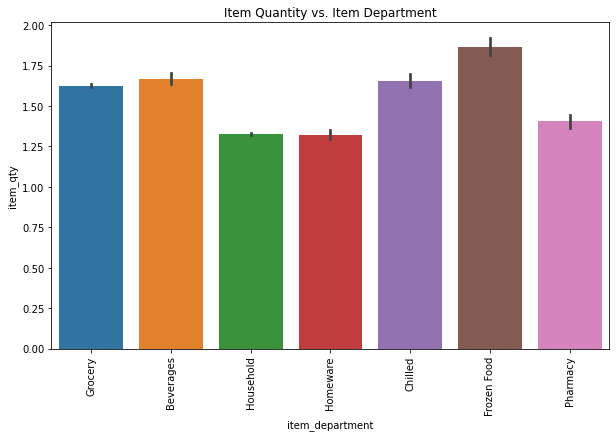

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='item_department', y='item_qty')
plt.xticks(rotation=90)
plt.title('Item Quantity vs. Item Department')
plt.show()

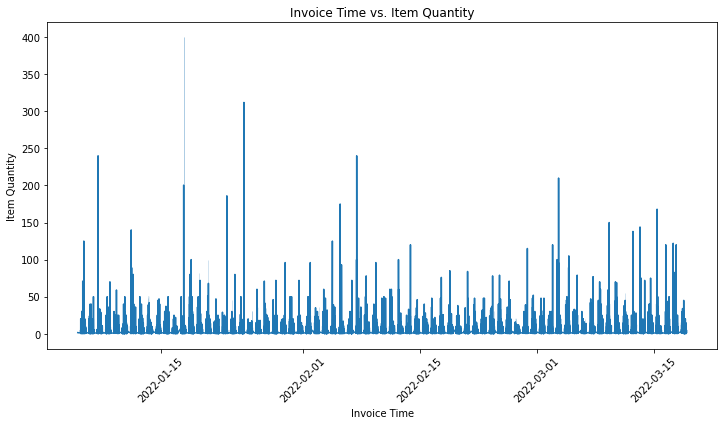

In [19]:
df['invoice_time'] = pd.to_datetime(df['invoice_time'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='invoice_time', y='item_qty')
plt.title('Invoice Time vs. Item Quantity')
plt.xlabel('Invoice Time')
plt.ylabel('Item Quantity')
plt.xticks(rotation=45)
plt.show()

In [20]:
df.item_code = df.item_code.astype(int, errors='ignore')

In [21]:
sort = df.groupby(['item_code', 'item_department'])[['item_qty']].sum().reset_index().sort_values(by=['item_department', 'item_qty'], ascending=False)
sort

,item_code,item_department,item_qty
427,48490,Pharmacy,503.0
2441,984463,Pharmacy,375.0
5139,1091455,Pharmacy,276.0
421,47194,Pharmacy,258.0
1323,268612,Pharmacy,255.0
...,...,...,...
4722,1085344,Beverages,1.0
4920,1088557,Beverages,1.0
5496,1098160,Beverages,1.0
5509,1098367,Beverages,1.0


In [22]:
topitems = pd.DataFrame()
for item_department in sort.item_department.unique():
    dummy = sort[sort.item_department==item_department][:25]
    topitems = pd.concat([topitems, dummy])
top25 = topitems.item_code.values
top25

array([  48490,  984463, 1091455,   47194,  268612, 1089979, 1029436,
        386854, 1092859,  524833,  129841, 1037410,   67345,  984454,
        383065, 1067038, 1098979,  390904, 1061890, 1097215, 1075633,
        208960,  989980, 1029445, 1077550,  590056,   37744,  117736,
        903805,   66931, 1064563,   65653, 1063771, 1005604, 1037581,
        428038,   92482, 1025908,  103894,   50911, 1047895, 1006900,
       1045789,   59344, 1096018, 1005631, 1010158,  107836, 1049821,
        121174, 1058632, 1058623,  915964,  952081,    1204, 1076677,
        888118,  952090,  374875,  964537,  270151,   21418, 1004758,
       1004992, 1087072,  401344, 1076668,  130282,  964438,  270133,
          7855, 1050622,  104596,  964492,  888172, 1084192,  193030,
         78415,   36808,   21049,   78361,    9700,  208294, 1045708,
        951946,  997216,  441016, 1084282, 1084219,  273544,  132028,
         20824, 1084264,  948076,  406726, 1084210,  643336,  910825,
        904579, 1084

In [23]:
top25_df = df[df.item_code.isin(top25)]
top25_df.invoice_time = pd.to_datetime(top25_df.invoice_time)
top25_df

C:\Users\se\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,item_code,invoice_num,invoice_time,item_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department
645,505825,4989509,2022-03-11 09:36:54+00:00,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages
646,505825,2124807,2022-03-11 09:11:50+00:00,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages
647,505825,3159614,2022-03-11 10:25:10+00:00,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages
648,505825,6937926,2022-03-11 09:15:12+00:00,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages
649,505825,3159589,2022-03-11 10:00:25+00:00,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages
...,...,...,...,...,...,...,...,...,...
346832,208960,6926904,2022-01-13 14:15:18+00:00,1.0,Lozenges,Lozenges,Cough Medicines,"Cough, Cold & Flu Relief",Pharmacy
346833,208960,3143308,2022-01-13 12:54:00+00:00,1.0,Lozenges,Lozenges,Cough Medicines,"Cough, Cold & Flu Relief",Pharmacy
346834,208960,6926847,2022-01-13 11:46:13+00:00,1.0,Lozenges,Lozenges,Cough Medicines,"Cough, Cold & Flu Relief",Pharmacy
346835,208960,4975203,2022-01-17 22:18:46+00:00,2.0,Lozenges,Lozenges,Cough Medicines,"Cough, Cold & Flu Relief",Pharmacy


In [24]:
len(top25_df.item_code.value_counts())

175

In [25]:
top25_df['date'] = top25_df['invoice_time'].dt.date
top25_df['hour'] = top25_df['invoice_time'].dt.time
top25_df

<ipython-input-25-b32f0f29a330>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top25_df['date'] = top25_df['invoice_time'].dt.date
<ipython-input-25-b32f0f29a330>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top25_df['hour'] = top25_df['invoice_time'].dt.time


,item_code,invoice_num,invoice_time,item_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department,date,hour
645,505825,4989509,2022-03-11 09:36:54+00:00,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,2022-03-11,09:36:54
646,505825,2124807,2022-03-11 09:11:50+00:00,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,2022-03-11,09:11:50
647,505825,3159614,2022-03-11 10:25:10+00:00,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,2022-03-11,10:25:10
648,505825,6937926,2022-03-11 09:15:12+00:00,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,2022-03-11,09:15:12
649,505825,3159589,2022-03-11 10:00:25+00:00,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,2022-03-11,10:00:25
...,...,...,...,...,...,...,...,...,...,...,...
346832,208960,6926904,2022-01-13 14:15:18+00:00,1.0,Lozenges,Lozenges,Cough Medicines,"Cough, Cold & Flu Relief",Pharmacy,2022-01-13,14:15:18
346833,208960,3143308,2022-01-13 12:54:00+00:00,1.0,Lozenges,Lozenges,Cough Medicines,"Cough, Cold & Flu Relief",Pharmacy,2022-01-13,12:54:00
346834,208960,6926847,2022-01-13 11:46:13+00:00,1.0,Lozenges,Lozenges,Cough Medicines,"Cough, Cold & Flu Relief",Pharmacy,2022-01-13,11:46:13
346835,208960,4975203,2022-01-17 22:18:46+00:00,2.0,Lozenges,Lozenges,Cough Medicines,"Cough, Cold & Flu Relief",Pharmacy,2022-01-17,22:18:46


In [26]:
top25_hourly = top25_df.groupby(['item_code', pd.Grouper(key="invoice_time", freq="1h")]).sum().reset_index()
top25_hourly

,item_code,invoice_time,item_qty
0,898,2022-01-13 18:00:00+00:00,48.0
1,898,2022-01-13 19:00:00+00:00,18.0
2,898,2022-01-13 20:00:00+00:00,3.0
3,898,2022-01-13 23:00:00+00:00,1.0
4,898,2022-01-14 08:00:00+00:00,14.0
...,...,...,...
44822,1107943,2022-03-15 16:00:00+00:00,1.0
44823,1107943,2022-03-16 15:00:00+00:00,1.0
44824,1107943,2022-03-17 13:00:00+00:00,1.0
44825,1107943,2022-03-17 17:00:00+00:00,6.0


In [27]:
target = pd.DataFrame()
for x in top25_hourly.item_code.unique():
    dummy = top25_hourly[top25_hourly.item_code==x]
    dummy.loc[:, 'target_qty'] = dummy.item_qty.shift(-1)
    target = pd.concat([target, dummy])
target = target.fillna(0).reset_index(drop=True)
target

C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\se\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,item_code,invoice_time,item_qty,target_qty
0,898,2022-01-13 18:00:00+00:00,48.0,18.0
1,898,2022-01-13 19:00:00+00:00,18.0,3.0
2,898,2022-01-13 20:00:00+00:00,3.0,1.0
3,898,2022-01-13 23:00:00+00:00,1.0,14.0
4,898,2022-01-14 08:00:00+00:00,14.0,16.0
...,...,...,...,...
44822,1107943,2022-03-15 16:00:00+00:00,1.0,1.0
44823,1107943,2022-03-16 15:00:00+00:00,1.0,1.0
44824,1107943,2022-03-17 13:00:00+00:00,1.0,6.0
44825,1107943,2022-03-17 17:00:00+00:00,6.0,1.0


In [28]:
target.isnull().sum()

item_code       0
invoice_time    0
item_qty        0
target_qty      0
dtype: int64

In [29]:
target.invoice_time.min()

Timestamp('2022-01-05 08:00:00+0000', tz='UTC')

In [30]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44827 entries, 0 to 44826
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   item_code     44827 non-null  int64              
 1   invoice_time  44827 non-null  datetime64[ns, UTC]
 2   item_qty      44827 non-null  float64            
 3   target_qty    44827 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1)
memory usage: 1.4 MB


In [31]:
pd.date_range(target.invoice_time.min(), target.invoice_time.max(), freq='H')

DatetimeIndex(['2022-01-05 08:00:00+00:00', '2022-01-05 09:00:00+00:00',
               '2022-01-05 10:00:00+00:00', '2022-01-05 11:00:00+00:00',
               '2022-01-05 12:00:00+00:00', '2022-01-05 13:00:00+00:00',
               '2022-01-05 14:00:00+00:00', '2022-01-05 15:00:00+00:00',
               '2022-01-05 16:00:00+00:00', '2022-01-05 17:00:00+00:00',
               ...
               '2022-03-18 13:00:00+00:00', '2022-03-18 14:00:00+00:00',
               '2022-03-18 15:00:00+00:00', '2022-03-18 16:00:00+00:00',
               '2022-03-18 17:00:00+00:00', '2022-03-18 18:00:00+00:00',
               '2022-03-18 19:00:00+00:00', '2022-03-18 20:00:00+00:00',
               '2022-03-18 21:00:00+00:00', '2022-03-18 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1743, freq='H')

In [32]:
fill = pd.DataFrame()
for item_code in target.item_code.unique():
    dummy = target[target.item_code==item_code]
    min_dt, max_dt = dummy.invoice_time.min(), dummy.invoice_time.max()
    datetime = pd.date_range(min_dt, max_dt, freq='H')
    left_df = pd.DataFrame({'invoice_time':datetime})
    joined = left_df.join(dummy.set_index('invoice_time'), on='invoice_time')
    fill = pd.concat([fill, joined])
fill

,invoice_time,item_code,item_qty,target_qty
0,2022-01-13 18:00:00+00:00,898.0,48.0,18.0
1,2022-01-13 19:00:00+00:00,898.0,18.0,3.0
2,2022-01-13 20:00:00+00:00,898.0,3.0,1.0
3,2022-01-13 21:00:00+00:00,NaN,NaN,NaN
4,2022-01-13 22:00:00+00:00,NaN,NaN,NaN
...,...,...,...,...
1673,2022-03-18 07:00:00+00:00,NaN,NaN,NaN
1674,2022-03-18 08:00:00+00:00,NaN,NaN,NaN
1675,2022-03-18 09:00:00+00:00,NaN,NaN,NaN
1676,2022-03-18 10:00:00+00:00,NaN,NaN,NaN


In [33]:
fill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294614 entries, 0 to 1677
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   invoice_time  294614 non-null  datetime64[ns, UTC]
 1   item_code     44827 non-null   float64            
 2   item_qty      44827 non-null   float64            
 3   target_qty    44827 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 11.2 MB


In [34]:
fill.item_code = fill.item_code.astype(int, errors='ignore')

In [35]:
masterdf = fill.join(items.set_index('item_code'), on='item_code')
masterdf

,invoice_time,item_code,item_qty,target_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department
0,2022-01-13 18:00:00+00:00,898.0,48.0,18.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages
1,2022-01-13 19:00:00+00:00,898.0,18.0,3.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages
2,2022-01-13 20:00:00+00:00,898.0,3.0,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages
3,2022-01-13 21:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-13 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1673,2022-03-18 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1674,2022-03-18 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1675,2022-03-18 09:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1676,2022-03-18 10:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294788 entries, 0 to 1677
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   invoice_time         294788 non-null  datetime64[ns, UTC]
 1   item_code            45001 non-null   float64            
 2   item_qty             45001 non-null   float64            
 3   target_qty           45001 non-null   float64            
 4   item_sub_segment     45001 non-null   object             
 5   item_segment         45001 non-null   object             
 6   item_category        45001 non-null   object             
 7   item_sub_department  45001 non-null   object             
 8   item_department      45001 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(3), object(5)
memory usage: 22.5+ MB


In [37]:
masterdf.isnull().sum()

invoice_time                0
item_code              249787
item_qty               249787
target_qty             249787
item_sub_segment       249787
item_segment           249787
item_category          249787
item_sub_department    249787
item_department        249787
dtype: int64

In [38]:
masterdf.fillna(-1, inplace=True)

In [39]:
print(masterdf.columns)

Index(['invoice_time', 'item_code', 'item_qty', 'target_qty',
       'item_sub_segment', 'item_segment', 'item_category',
       'item_sub_department', 'item_department'],
      dtype='object')


In [40]:
masterdf['item_department'].unique()

array(['Beverages', -1, 'Homeware', 'Chilled', 'Grocery', 'Frozen Food',
       'Household', 'Pharmacy'], dtype=object)

In [41]:
#avg sales per dept
avg_dept_sales = masterdf.groupby('item_department')['item_qty'].mean().reset_index()
avg_dept_sales.rename(columns={'item_qty': 'avg_dept_sales'}, inplace=True)

masterdf = masterdf.merge(avg_dept_sales, on='item_department', how='left')
masterdf.head()

,invoice_time,item_code,item_qty,target_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department,avg_dept_sales
0,2022-01-13 18:00:00+00:00,898.0,48.0,18.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387
1,2022-01-13 19:00:00+00:00,898.0,18.0,3.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387
2,2022-01-13 20:00:00+00:00,898.0,3.0,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387
3,2022-01-13 21:00:00+00:00,-1.0,-1.0,-1.0,-1,-1,-1,-1,-1,-1.000000
4,2022-01-13 22:00:00+00:00,-1.0,-1.0,-1.0,-1,-1,-1,-1,-1,-1.000000


In [42]:
#hourly sales
masterdf['hour'] = masterdf['invoice_time'].dt.hour
hourly_sales = masterdf.groupby(['item_department', 'hour'])['item_qty'].mean().reset_index()
hourly_sales.columns = ['item_department', 'hour', 'hourly_sales']


masterdf = masterdf.merge(hourly_sales, on=['item_department', 'hour'], how='left')
masterdf.head()

,invoice_time,item_code,item_qty,target_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department,avg_dept_sales,hour,hourly_sales
0,2022-01-13 18:00:00+00:00,898.0,48.0,18.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,18,4.787786
1,2022-01-13 19:00:00+00:00,898.0,18.0,3.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,19,5.222222
2,2022-01-13 20:00:00+00:00,898.0,3.0,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,20,6.844302
3,2022-01-13 21:00:00+00:00,-1.0,-1.0,-1.0,-1,-1,-1,-1,-1,-1.000000,21,-1.000000
4,2022-01-13 22:00:00+00:00,-1.0,-1.0,-1.0,-1,-1,-1,-1,-1,-1.000000,22,-1.000000


In [43]:
#max sales per dept
dept_max_sales = masterdf.groupby('item_department')['item_qty'].max().reset_index()
dept_max_sales.rename(columns={'item_qty': 'dept_max_sales'}, inplace=True)

masterdf = masterdf.merge(dept_max_sales, on='item_department', how='left')
masterdf.head()

,invoice_time,item_code,item_qty,target_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department,avg_dept_sales,hour,hourly_sales,dept_max_sales
0,2022-01-13 18:00:00+00:00,898.0,48.0,18.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,18,4.787786,403.0
1,2022-01-13 19:00:00+00:00,898.0,18.0,3.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,19,5.222222,403.0
2,2022-01-13 20:00:00+00:00,898.0,3.0,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,20,6.844302,403.0
3,2022-01-13 21:00:00+00:00,-1.0,-1.0,-1.0,-1,-1,-1,-1,-1,-1.000000,21,-1.000000,-1.0
4,2022-01-13 22:00:00+00:00,-1.0,-1.0,-1.0,-1,-1,-1,-1,-1,-1.000000,22,-1.000000,-1.0


In [44]:
#min sales per dept
dept_min_sales = masterdf.groupby('item_department')['item_qty'].min().reset_index()
dept_min_sales.rename(columns={'item_qty': 'dept_min_sales'}, inplace=True)

masterdf = masterdf.merge(dept_min_sales, on='item_department', how='left')
masterdf.head()

,invoice_time,item_code,item_qty,target_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department,avg_dept_sales,hour,hourly_sales,dept_max_sales,dept_min_sales
0,2022-01-13 18:00:00+00:00,898.0,48.0,18.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,18,4.787786,403.0,1.0
1,2022-01-13 19:00:00+00:00,898.0,18.0,3.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,19,5.222222,403.0,1.0
2,2022-01-13 20:00:00+00:00,898.0,3.0,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,20,6.844302,403.0,1.0
3,2022-01-13 21:00:00+00:00,-1.0,-1.0,-1.0,-1,-1,-1,-1,-1,-1.000000,21,-1.000000,-1.0,-1.0
4,2022-01-13 22:00:00+00:00,-1.0,-1.0,-1.0,-1,-1,-1,-1,-1,-1.000000,22,-1.000000,-1.0,-1.0


In [45]:
#avg weekday sales
weekday_sales = masterdf[masterdf['invoice_time'].dt.dayofweek < 5]
avg_weekday_sales = weekday_sales.groupby('item_department')['item_qty'].mean().reset_index()
avg_weekday_sales.columns = ['item_department', 'avg_weekday_sales']

masterdf = masterdf.merge(avg_weekday_sales, on='item_department', how='left')
masterdf.head()

,invoice_time,item_code,item_qty,target_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department,avg_dept_sales,hour,hourly_sales,dept_max_sales,dept_min_sales,avg_weekday_sales
0,2022-01-13 18:00:00+00:00,898.0,48.0,18.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,18,4.787786,403.0,1.0,5.532317
1,2022-01-13 19:00:00+00:00,898.0,18.0,3.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,19,5.222222,403.0,1.0,5.532317
2,2022-01-13 20:00:00+00:00,898.0,3.0,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,20,6.844302,403.0,1.0,5.532317
3,2022-01-13 21:00:00+00:00,-1.0,-1.0,-1.0,-1,-1,-1,-1,-1,-1.000000,21,-1.000000,-1.0,-1.0,-1.000000
4,2022-01-13 22:00:00+00:00,-1.0,-1.0,-1.0,-1,-1,-1,-1,-1,-1.000000,22,-1.000000,-1.0,-1.0,-1.000000


In [46]:
#avg weekend sales
weekend_sales = masterdf[(masterdf['invoice_time'].dt.dayofweek >= 5) & (masterdf['invoice_time'].dt.dayofweek <= 6)]
avg_weekend_sales = weekend_sales.groupby('item_department')['item_qty'].mean().reset_index()
avg_weekend_sales.columns = ['item_department', 'avg_weekend_sales']

masterdf = masterdf.merge(avg_weekend_sales, on='item_department', how='left')
masterdf.head()

,invoice_time,item_code,item_qty,target_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department,avg_dept_sales,hour,hourly_sales,dept_max_sales,dept_min_sales,avg_weekday_sales,avg_weekend_sales
0,2022-01-13 18:00:00+00:00,898.0,48.0,18.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,18,4.787786,403.0,1.0,5.532317,5.111485
1,2022-01-13 19:00:00+00:00,898.0,18.0,3.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,19,5.222222,403.0,1.0,5.532317,5.111485
2,2022-01-13 20:00:00+00:00,898.0,3.0,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,20,6.844302,403.0,1.0,5.532317,5.111485
3,2022-01-13 21:00:00+00:00,-1.0,-1.0,-1.0,-1,-1,-1,-1,-1,-1.000000,21,-1.000000,-1.0,-1.0,-1.000000,-1.000000
4,2022-01-13 22:00:00+00:00,-1.0,-1.0,-1.0,-1,-1,-1,-1,-1,-1.000000,22,-1.000000,-1.0,-1.0,-1.000000,-1.000000


In [47]:
# masterdf.fillna(0, inplace=True)
# masterdf

In [48]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [49]:
X_train = masterdf.drop('target_qty', axis=1)
y_train = masterdf.loc[:, 'target_qty']

In [50]:
X_train.head()

,invoice_time,item_code,item_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department,avg_dept_sales,hour,hourly_sales,dept_max_sales,dept_min_sales,avg_weekday_sales,avg_weekend_sales
0,2022-01-13 18:00:00+00:00,898.0,48.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,18,4.787786,403.0,1.0,5.532317,5.111485
1,2022-01-13 19:00:00+00:00,898.0,18.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,19,5.222222,403.0,1.0,5.532317,5.111485
2,2022-01-13 20:00:00+00:00,898.0,3.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,5.420387,20,6.844302,403.0,1.0,5.532317,5.111485
3,2022-01-13 21:00:00+00:00,-1.0,-1.0,-1,-1,-1,-1,-1,-1.000000,21,-1.000000,-1.0,-1.0,-1.000000,-1.000000
4,2022-01-13 22:00:00+00:00,-1.0,-1.0,-1,-1,-1,-1,-1,-1.000000,22,-1.000000,-1.0,-1.0,-1.000000,-1.000000


In [51]:
X_train.columns

Index(['invoice_time', 'item_code', 'item_qty', 'item_sub_segment',
       'item_segment', 'item_category', 'item_sub_department',
       'item_department', 'avg_dept_sales', 'hour', 'hourly_sales',
       'dept_max_sales', 'dept_min_sales', 'avg_weekday_sales',
       'avg_weekend_sales'],
      dtype='object')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [53]:
categorical = ['item_code', 'item_sub_segment', 'item_segment','item_category', 
               'item_sub_department', 'item_department']
numerical = ['item_qty', 'avg_dept_sales','hour','hourly_sales','dept_max_sales',
             'dept_min_sales','avg_weekday_sales','avg_weekend_sales']

In [54]:
columns = ['item_code', 'item_sub_segment', 'item_segment','item_category', 
           'item_sub_department', 'item_department']

for column in columns:
    X_train.loc[:, column] = X_train[column].astype(str)

In [55]:
numerical_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [56]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transform, numerical),
        ('categorical', categorical_transform, categorical),])

In [57]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())])

In [58]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['item_qty', 'avg_dept_sales',
                                                   'hour', 'hourly_sales',
                                                   'dept_max_sales',
                                                   'dept_min_sales',
                                                   'avg_weekday_sales',
                                                   'avg_weekend_sales']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imp

In [59]:
param_grid = {'model__n_estimators': [100, 200, 300],
              'model__max_depth': [3, 4, 5],
              'model__learning_rate': [0.01, 0.1, 0.2]}

In [60]:
grid_search = GridSearchCV(estimator=pipeline, 
                           param_grid=param_grid, 
                           cv=5, n_jobs=-1, 
                           scoring='neg_mean_absolute_error')

In [61]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['item_qty',
                                                                          'avg_dept_sales',
                                                                          'hour',
                                                                          'hourly_sales',
                                                                     

In [62]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300}
Best Score:  -0.40839577315237585


In [63]:
# feature importance
f_col = []
f = []

for i, column in enumerate(X_train.columns):
    print('The feature importance for {} is: {}'.format(column, pipeline.named_steps['model'].feature_importances_[i]))

    f_col.append(column)
    f.append(pipeline.named_steps['model'].feature_importances_[i])

The feature importance for invoice_time is: 0.002483460819348693
The feature importance for item_code is: 0.5768918991088867
The feature importance for item_qty is: 0.0018109522061422467
The feature importance for item_sub_segment is: 0.0017453667242079973
The feature importance for item_segment is: 0.027061978355050087
The feature importance for item_category is: 0.000321648723911494
The feature importance for item_sub_department is: 0.0
The feature importance for item_department is: 0.0
The feature importance for avg_dept_sales is: 0.0
The feature importance for hour is: 0.00015623742365278304
The feature importance for hourly_sales is: 0.0010042899521067739
The feature importance for dept_max_sales is: 0.008271722123026848
The feature importance for dept_min_sales is: 0.0
The feature importance for avg_weekday_sales is: 0.0
The feature importance for avg_weekend_sales is: 0.0006977611337788403


In [64]:
y_pred = best_model.predict(X_test)

In [65]:
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

RMSE: 5.619903018664598
MAE: 0.3993305465577739
R-squared: 0.4070646090051664
